<a href="https://colab.research.google.com/github/mahyahashemi/RKHS_Project/blob/main/code_fvs_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [104]:
N_m=50

In [105]:
url = 'https://raw.githubusercontent.com/mahyahashemi/RKHS_Project/main/datasets/ecoli3.csv'
sample = pd.read_csv(url, on_bad_lines='skip')

In [106]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Class'])
encoder

OrdinalEncoder(cols=['Class'])

In [108]:
sample=encoder.fit_transform(sample)

In [109]:
sample=sample.fillna(0)
sample

,Mcg,Gvh,Lip,Chg,Aac,Alm1,Alm2,Class
0,0.68,0.49,1.00,0.5,0.62,0.55,0.28,1
1,0.75,0.84,0.48,0.5,0.35,0.52,0.33,1
2,0.52,0.44,0.48,0.5,0.37,0.36,0.42,1
3,0.87,0.49,0.48,0.5,0.61,0.76,0.79,2
4,0.41,0.51,0.48,0.5,0.58,0.20,0.31,1
...,...,...,...,...,...,...,...,...
331,0.64,0.81,0.48,0.5,0.37,0.39,0.44,1
332,0.71,0.71,0.48,0.5,0.68,0.43,0.36,1
333,0.53,0.38,0.48,0.5,0.44,0.26,0.36,1
334,0.86,0.39,0.48,0.5,0.59,0.89,0.90,2


In [110]:
pd.unique(sample['Class'])

array([1, 2])

In [111]:
data=sample.values

In [112]:
A = data[:,:-1]
y = data[:,-1]

In [113]:
display(A)
display(y)

array([[0.68, 0.49, 1.  , ..., 0.62, 0.55, 0.28],
       [0.75, 0.84, 0.48, ..., 0.35, 0.52, 0.33],
       [0.52, 0.44, 0.48, ..., 0.37, 0.36, 0.42],
       ...,
       [0.53, 0.38, 0.48, ..., 0.44, 0.26, 0.36],
       [0.86, 0.39, 0.48, ..., 0.59, 0.89, 0.9 ],
       [0.57, 0.59, 0.48, ..., 0.39, 0.47, 0.33]])

array([1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [114]:
A_train,A_test=train_test_split(A,test_size=0.3,random_state=42)
y_train,y_test=train_test_split(y,test_size=0.3,random_state=42)
display(y_train)
display(y_test)

array([1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1.])

In [115]:
def sigma(A):
    N = A.shape[0]
    sigma = []
    for i in range(N):
        for j in range(i+1, N):
            sigma.append(np.square(np.linalg.norm(A[i,:]-A[j,:])))

    return 0.1 * np.max(sigma)

In [116]:
sig=sigma(A)
print(sig)

0.18772000000000003


In [117]:
def K(FV1, FV2):
    dist = np.linalg.norm(FV1-FV2)
    return np.exp(-1*np.square(dist)/(2*sig))

In [118]:
def give_KSS(S):
    KSS = []
    for i in S:
        for j in S:
            KSS.append( K(A[i,:], A[j,:]))

    return np.array(KSS).reshape((len(S), len(S)))

In [119]:
def give_KSx(S, x):
    KSx = []
    for i in S:
        kx = K(A[i,:], x)
        KSx.append(kx)
    return np.array(KSx).reshape((len(S), 1))

In [120]:
def give_beta(S, x):
    KSx = give_KSx(S, x).reshape(len(S), 1)
    KSS = give_KSS(S)
    DSS = np.diag(np.diag(np.sqrt(KSS)))
    beta = np.dot(np.dot(np.transpose(KSx), np.linalg.inv(KSS)), DSS)
    return beta

In [121]:
minor_index=np.where(y_train==1)[0].tolist()
lambdamax=-np.inf
best_iter=-1
counter=0
total_S=[]
lam = []
for i in minor_index:
    current_S=[i]
    ctrl=1
    while (len(current_S)<N_m and ctrl==1):
        current_inv =np.linalg.inv(give_KSS(current_S))
        max_LF=-np.inf
        max_LF_index=-1
        remaining=list(set(range(A_train.shape[0]))-set(current_S))
        #print(remaining)
        for j in remaining:
            KSx=give_KSx(current_S,A_train[j,:])
            LF =abs(1-((KSx.T).dot(current_inv).dot(KSx)))
            if LF> max_LF:
                max_LF=LF
                max_LF_index=j
        if(max_LF<0.001):
            ctrl=0
        else:
            current_S.append(max_LF_index)
    total_S.append(current_S)
    
    S0=list(set(current_S)& (set(range(A_train.shape[0]))-set(minor_index)))
    S1=list(set(current_S) & set(minor_index))
    B0=np.zeros((len(S0),len(current_S) ))
    B1=np.zeros((len(S1), len(current_S)))
    rownum=0
    for k in S0:
        B0[rownum,:]=give_beta(current_S, A_train[k,:]).flatten()
        rownum=rownum+1
    rownum=0
    for k in S1:
        B1[rownum,:]=give_beta(current_S, A_train[k,:]).flatten()
        rownum=rownum+1
        
    mean0=B0.mean(axis=0)
    mean1=B1.mean(axis=0)
    
    var0=B0.var(axis=0)
    var1=B1.var(axis=0)
    
    lam=(((mean0-mean1)**2)/(var0+var1))
    

    total_lam=np.sum(lam)/np.shape(lam)[0]
    print(total_lam)
    if(lambdamax<total_lam-1000*((1-(((y_train[current_S]==1).sum())/((y_train[current_S]==0).sum())))**2)):
        lambdamax=total_lam
        best_iter=counter
    counter=counter+1




A_train[total_S[best_iter],:]

print(total_S[best_iter])
        
    
    
    

0.575368278924526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in long_scalars


0.2326906281516804
0.19487395102920665
0.2590741846916329
0.24169810378037884
0.2517741567211946
0.2421920744479725
0.24544937235911302
0.2093805588563472
0.28740267027482713
0.1634788697495153
0.16597503141509623
0.22564881053579156
0.19310440870313209
0.28335312368014187
0.24740490623241532
0.2494488970234872
0.2238333648086982
0.2294449590669309
0.1651773081566437
0.19111311142719914
0.23137093455402688
0.22670072290387366
0.18042255899122506
0.222882661345559
0.3454750931488635
0.2212603139554373
0.16517730815684611
0.27107757199324367
0.266712829173263
0.21523975358024353
0.15481631688445796
0.2583914277367104
0.18624753290645019
0.19626050849719728
0.16878141361123983
0.16517730815638246
0.22383336481009014
0.2684289368823397
0.24278553344220785
0.20444126186845615
0.25061821533506784
0.2321713108177964
0.21492347880276663
0.1651773081563988
0.2357645160242689
0.273217210044473
0.2162059983322918
0.2867233342704484
0.16284579482189884
0.22783555037615066
0.2312067496358624
0.2630

In [122]:
model = svm.SVC(C=1000,kernel = "rbf", gamma =1/(2*sig))

In [123]:
model.fit(A_train[total_S[best_iter],:], y_train[total_S[best_iter]])

SVC(C=1000, gamma=2.663541444704879)

In [124]:
model.score(A_test, y_test)

0.8811881188118812

In [125]:
# Enter minor major labels
minor_cls = 2
major_cls = 1
cls_types= np.array([major_cls, minor_cls])

In [126]:
cls_types

array([1, 2])

Text(0.5, 89.87999999999997, 'Predicted')

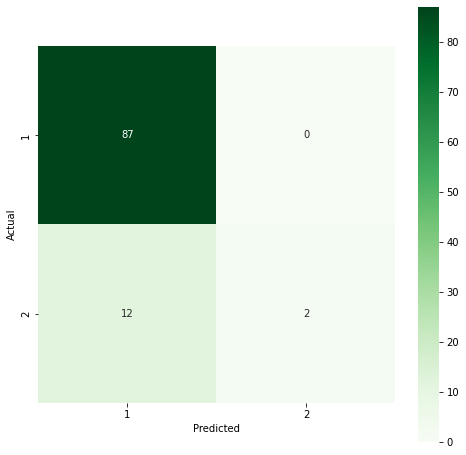

In [127]:
Y_pred = model.predict(A_test)
Y_true = y_test
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=cls_types, yticklabels=cls_types)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [128]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

TPR = TP / (TP+FN)
TNR = TN / (TN+FP)
precision = TP / (TP+FP)
recall=TP/(TP+FN)                  

In [129]:
G_mean = np.sqrt(TPR*TNR)
F_measure = (2*precision*TPR)/(precision+TPR)

print(G_mean)
print(F_measure)
print(precision)
print(recall)

0.3779644730092272
0.25
1.0
0.14285714285714285


In [130]:
print(A_train[total_S[best_iter],:])

[[0.38 0.3  0.48 0.5  0.43 0.29 0.39]
 [0.29 0.3  0.48 0.5  0.45 0.03 0.17]
 [0.75 0.55 1.   1.   0.4  0.47 0.3 ]
 [0.67 0.55 1.   0.5  0.66 0.58 0.16]
 [0.6  0.76 1.   0.5  0.77 0.59 0.52]
 [0.68 0.49 1.   0.5  0.62 0.55 0.28]
 [0.06 0.61 0.48 0.5  0.49 0.92 0.37]
 [0.49 0.61 1.   0.5  0.56 0.71 0.74]
 [0.66 0.49 1.   0.5  0.54 0.56 0.36]
 [0.7  0.39 1.   0.5  0.51 0.82 0.84]
 [0.6  0.5  1.   0.5  0.54 0.77 0.8 ]
 [0.61 0.47 0.48 0.5  0.   0.8  0.32]
 [0.1  0.49 0.48 0.5  0.41 0.67 0.21]
 [0.77 0.57 0.48 0.5  0.88 0.53 0.2 ]
 [0.   0.51 0.48 0.5  0.35 0.67 0.44]
 [0.75 0.76 0.48 0.5  0.83 0.57 0.3 ]
 [0.69 0.59 0.48 0.5  0.77 0.39 0.21]
 [0.46 0.59 0.48 0.5  0.36 0.76 0.23]
 [0.63 0.49 0.48 0.5  0.79 0.45 0.28]
 [0.12 0.67 0.48 0.5  0.74 0.58 0.63]
 [0.74 0.78 0.48 0.5  0.75 0.54 0.15]
 [0.4  0.45 0.48 0.5  0.38 0.22 0.  ]
 [0.5  0.66 0.48 0.5  0.31 0.92 0.92]
 [0.3  0.51 0.48 0.5  0.42 0.61 0.34]
 [0.56 0.68 0.48 0.5  0.77 0.36 0.45]
 [0.63 0.57 0.48 0.5  0.49 0.7  0.2 ]
 [0.72 0.86 

In [131]:
print(y_train[total_S[best_iter]])

[1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2.]


In [132]:
x1 = A_train[:, 0]
x2 = A_train[:, 1]
y1 = y_train.astype(int)
#plt.scatter(x1[y1==0], x2[y1==0], s=25, c='r')
#plt.scatter(x1[y1==1], x2[y1==1], s=25, c='b')
plot_decision_regions(A_train[total_S[best_iter],:], y_train[total_S[best_iter]], clf=model)

ValueError: ignored

In [ ]:
x3 = A_test[:, 0]
x4 = A_test[:, 1]
y2 = y_test.astype(int)
plt.scatter(x3[y2==0], x4[y2==0], s=25, c='green')
plt.scatter(x3[y2==1], x4[y2==1], s=25, c='orange')
plot_decision_regions(A_test, y_test, clf=model)

In [ ]:
from sklearn.model_selection import cross_val_score
x=A_train[total_S[best_iter]]
y=y_train[total_S[best_iter]]
model = svm.SVC(C=1000.0,kernel = "rbf", gamma =1/(2*sig))
cv_met=cross_val_score(model,x,y,cv=5,scoring=None)
print(cross_val_score(model,x,y,cv=5,scoring=None))

In [ ]:
from sklearn import metrics
cv_met=cross_val_score(model,x,y,cv=5,scoring='f1_macro')


In [ ]:
print(f"The cross-validation f1 is: {np.mean(cv_met)*100:.2f}%")